In [4]:
!pip install mlfromscratch


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
375/375 [==============================] - 38s 95ms/step - loss: 0.2894 - accuracy: 0.9114 - val_loss: 0.0723 - val_accuracy: 0.9792
Epoch 2/10
375/375 [==============================] - 32s 86ms/step - loss: 0.0639 - accuracy: 0.9805 - val_loss: 0.0530 - val_accuracy: 0.9840
Epoch 3/10
375/375 [==============================] - 35s 94ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0459 - val_accuracy: 0.9859
Epoch 4/10
375/375 [==============================] - 33s 88ms/step - loss: 0.0334 - accuracy: 0.9893 - val_loss: 0.0413 - val_accuracy: 0.9883
Epoch 5/10
375/375 [==============================] - 36s 95ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.0355 - val_accuracy: 0.9894
Epoch 6/10
375/375 [==============================] - 41s 110ms/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.0348 - val_accuracy: 0.9902
Epoch 7/10
375/375 [==============================] - 33s 87ms/step - 

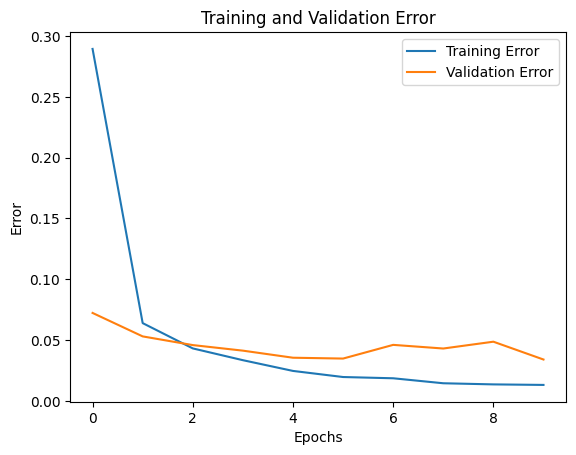

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
from tensorflow.keras.datasets import mnist

# 載入資料集
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize and reshape the data
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# 對標籤進行 One-hot 編碼
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# 分割資料
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 模型架構／調整模型結構
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 編譯模型
model.compile(optimizer=optimizers.Adam(),
              loss=losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# 訓練模型／超參數調優
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

# 評估模型
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# 繪製訓練和驗證誤差圖
plt.plot(history.history['loss'], label='Training Error')
plt.plot(history.history['val_loss'], label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training and Validation Error')
plt.legend()
plt.show()
